<a href="https://colab.research.google.com/github/kavya-0606/Intruder-Detection/blob/main/Intruder_detection_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/Burglary_day_time.v6i.coco.zip

Archive:  /content/Burglary_day_time.v6i.coco.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
 extracting: test/Burglary026_x264_mp4-3_jpg.rf.300078aebb4c5d7d52d499a0d3f8289d.jpg  
 extracting: test/Burglary026_x264_mp4-4_jpg.rf.6c89d8b02fac3dc65fea852feb1cc3b2.jpg  
 extracting: test/Burglary026_x264_mp4-5_jpg.rf.253255e04f93f54c9ba172d3eadeb2d2.jpg  
 extracting: test/Burglary026_x264_mp4-6_jpg.rf.3982eb9874583de2fcbd17e02a27a527.jpg  
 extracting: test/Burglary026_x264_mp4-7_jpg.rf.ac1ce06fc583a37d7bebc98207af8cc1.jpg  
 extracting: test/Burglary026_x264_mp4-8_jpg.rf.f201a90d0a1a5efdfc90d3e256ba189c.jpg  
 extracting: test/Burglary026_x264_mp4-9_jpg.rf.f3ae94c567d368ab7751c443375bb409.jpg  
 extracting: test/Burglary049_x264_mp4-105_jpg.rf.b8d1415d850d7bf4b6d1f84f24f500ef.jpg  
 extracting: test/Burglary049_x264_mp4-109_jpg.rf.37c01eec5e8a23b13cc473d77df59583.jpg  
 extracting: test/Burglary049_x264_mp4-110_jpg.rf.a8b4bfef5a68ec4164

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the path to the dataset
dataset_path = '/content/train'

# Get all image file names
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

PREPROCESSING


In [ ]:
IMG_SIZE = (224, 224)

resized_images = []
for img_name in image_files:
    img_path = os.path.join(dataset_path, img_name)
    img = load_img(img_path, target_size=IMG_SIZE)  # Load and resize
    img_array = img_to_array(img)  # Convert to array
    resized_images.append(img_array)

# Convert to numpy array
resized_images = np.array(resized_images)

# Normalize pixel values to range [0,1]
resized_images = resized_images / 255.0

gray_images = []
for img_name in image_files:
    img_path = os.path.join(dataset_path, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    img = cv2.resize(img, IMG_SIZE)  # Resize
    gray_images.append(img)

gray_images = np.array(gray_images) / 255.0  # Normalize

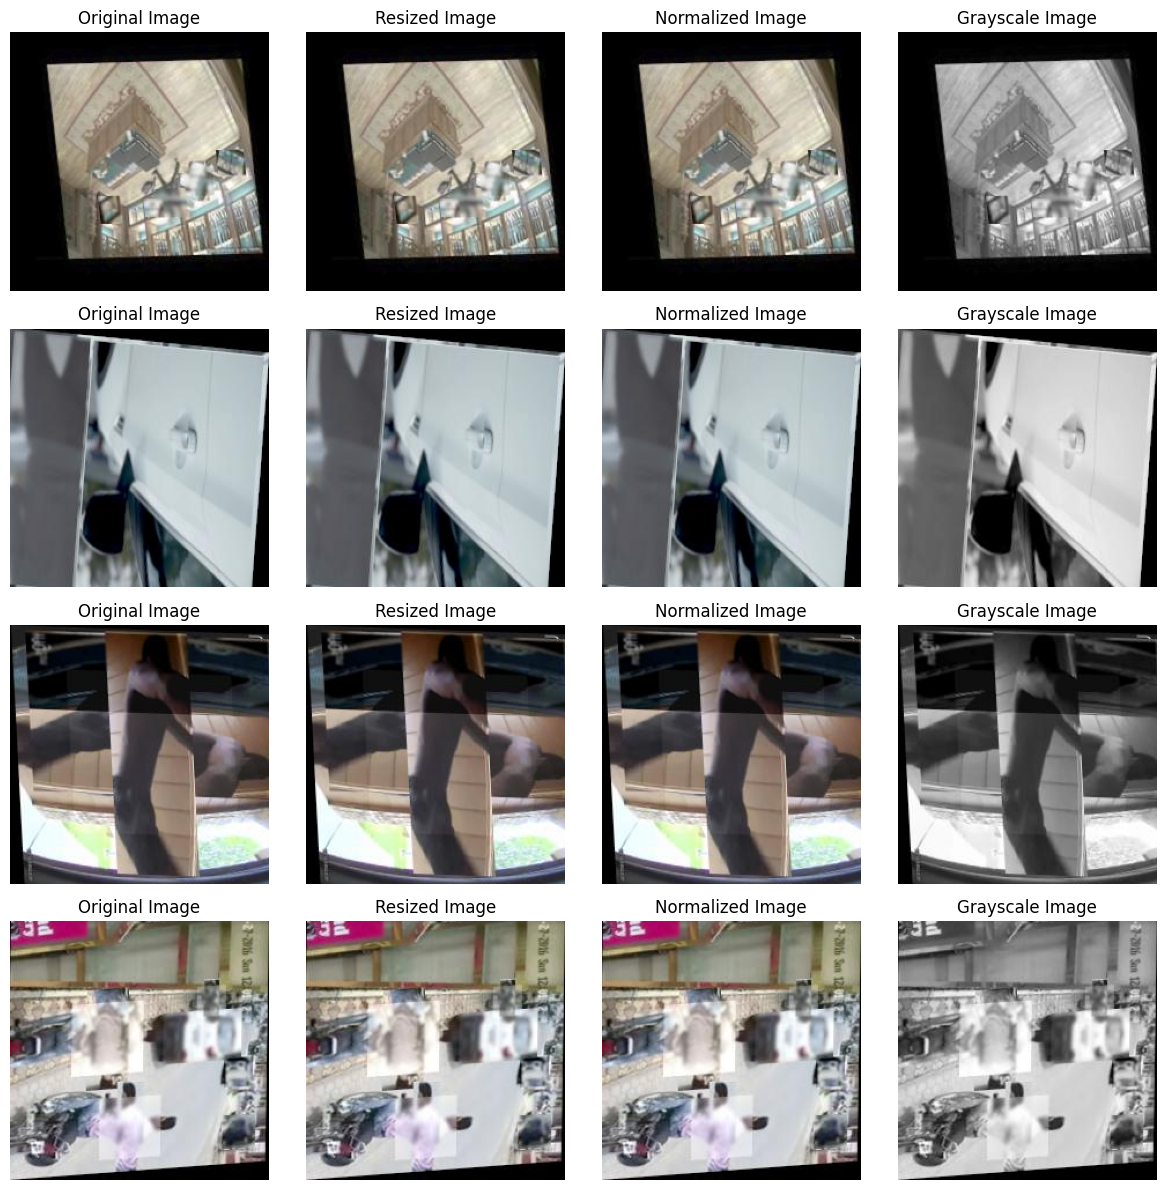

In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Define the dataset path
dataset_path = '/content/train'

# Get all image file names
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select 4 random images
random_images = random.sample(image_files, 4)

IMG_SIZE = (224, 224)

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for i, img_name in enumerate(random_images):
    img_path = os.path.join(dataset_path, img_name)

    # Load original image
    original_img = load_img(img_path)
    original_array = img_to_array(original_img) / 255.0  # Normalize for display

    # Load and resize image
    resized_img = load_img(img_path, target_size=IMG_SIZE)
    resized_array = img_to_array(resized_img) / 255.0  # Normalize for display

    # Convert to grayscale
    gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    gray_img = cv2.resize(gray_img, IMG_SIZE) / 255.0  # Normalize for display

    # Display images
    axes[i, 0].imshow(original_array)
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    axes[i, 1].imshow(resized_array)
    axes[i, 1].set_title("Resized Image")
    axes[i, 1].axis("off")

    axes[i, 2].imshow(resized_array)
    axes[i, 2].set_title("Normalized Image")
    axes[i, 2].axis("off")

    axes[i, 3].imshow(gray_img, cmap="gray")
    axes[i, 3].set_title("Grayscale Image")
    axes[i, 3].axis("off")

plt.tight_layout()
plt.show()


FEATURE EXTRACTION

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


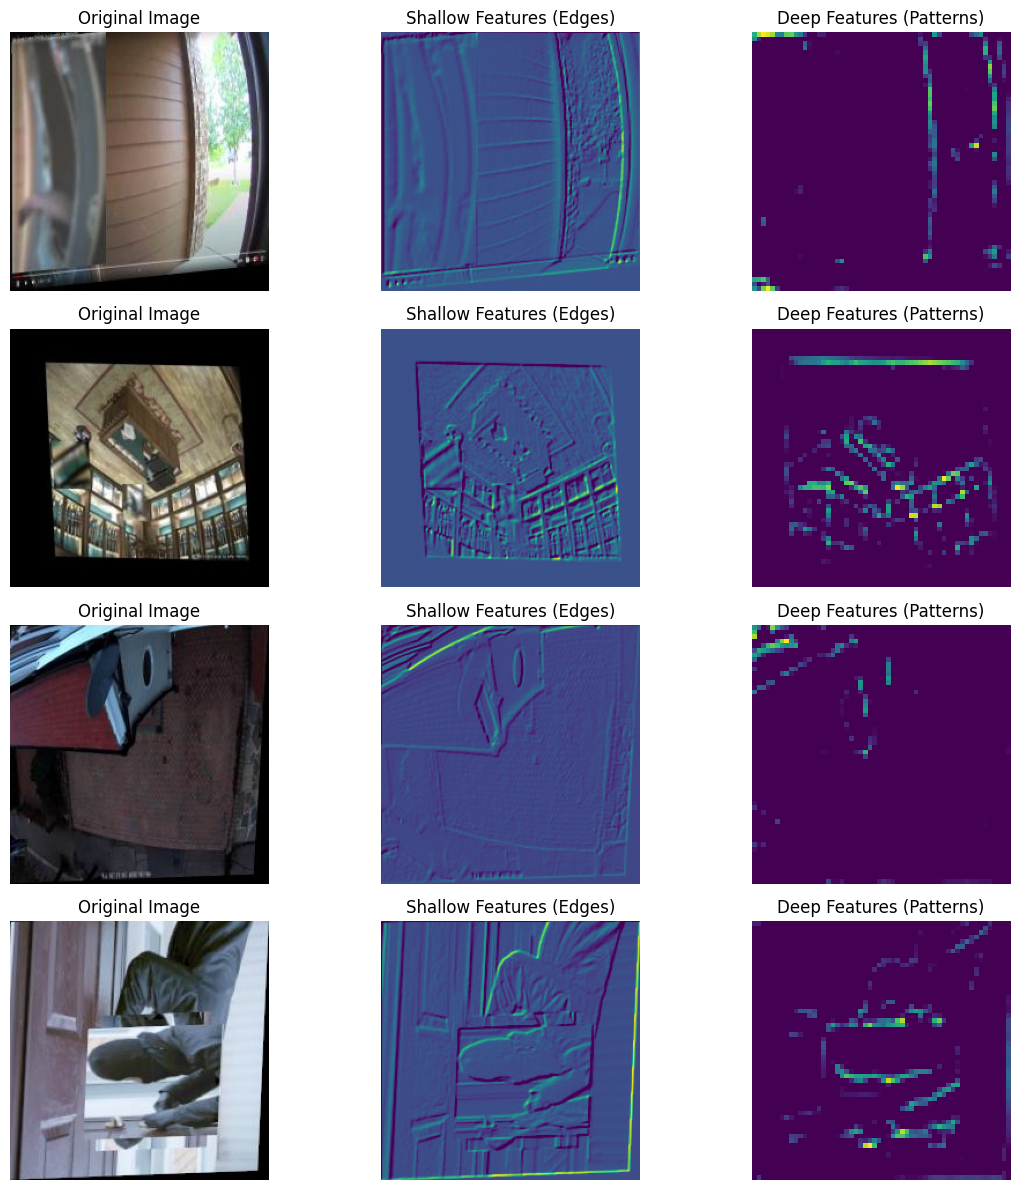

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load pre-trained VGG16 model (without fully connected layers)
base_model = VGG16(weights="imagenet", include_top=False)

# Select layers for feature extraction
layer_names = ["block1_conv1", "block3_conv1"]  # Extract from shallow & deep layers
feature_model = Model(inputs=base_model.input, outputs=[base_model.get_layer(name).output for name in layer_names])

# Define dataset path
dataset_path = "/content/train"

# Get image file names
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select 4 random images
random_images = random.sample(image_files, 4)

IMG_SIZE = (224, 224)

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for i, img_name in enumerate(random_images):
    img_path = os.path.join(dataset_path, img_name)

    # Load and preprocess image
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Extract features using CNN
    features = feature_model.predict(img_array)

    # Display original image
    axes[i, 0].imshow(img)
    axes[i, 0].set_title("Original Image")
    axes[i, 0].axis("off")

    # Display feature map from first convolutional layer
    feature_map_1 = features[0][0, :, :, 0]  # Take first filter
    axes[i, 1].imshow(feature_map_1, cmap="viridis")
    axes[i, 1].set_title("Shallow Features (Edges)")
    axes[i, 1].axis("off")

    # Display feature map from a deeper layer
    feature_map_2 = features[1][0, :, :, 0]  # Take first filter
    axes[i, 2].imshow(feature_map_2, cmap="viridis")
    axes[i, 2].set_title("Deep Features (Patterns)")
    axes[i, 2].axis("off")

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Feature Map Shape for Burglary_DayTime_1_mov-160_jpg.rf.4dbc94a391f142067b846aebe25d7773.jpg: (1, 224, 224, 64)


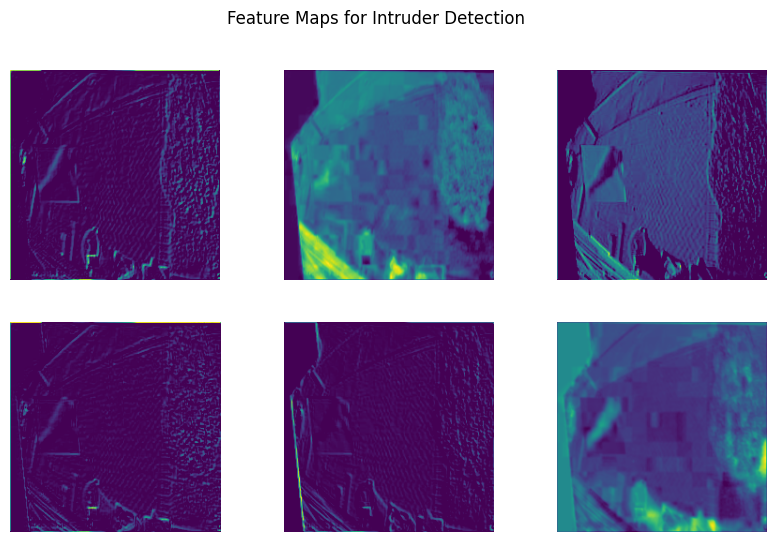

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Feature Map Shape for Burglary049_x264_mp4-69_jpg.rf.7b82171a54da3009464a836c869efd2b.jpg: (1, 224, 224, 64)


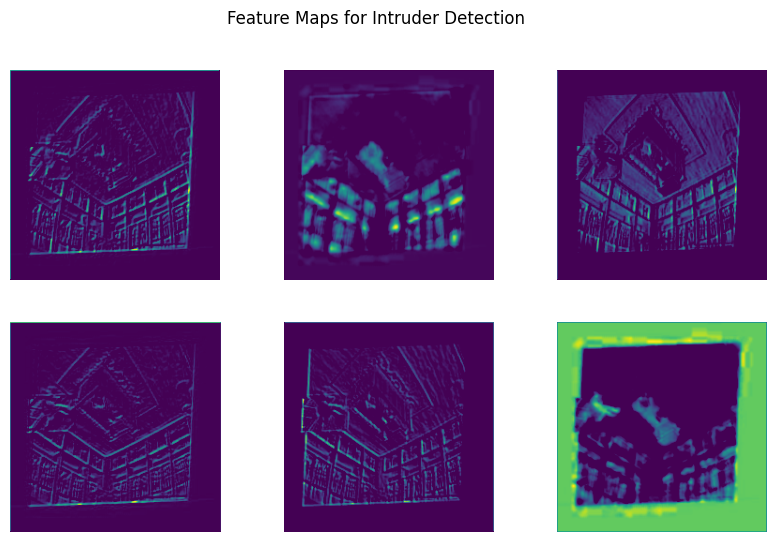

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model

# Load pre-trained VGG16 model without the classification head
model = VGG16(weights="imagenet", include_top=False)

# Define training dataset directory
train_dir = "/content/train"

# Get a list of image file paths
image_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.endswith(".jpg")]

# Randomly select two images
selected_images = random.sample(image_files, 2)

# Get feature maps from the first convolutional layer
layer_name = "block1_conv1"
layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Process and visualize feature maps for each image
for img_path in selected_images:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract feature maps
    feature_maps = layer_model.predict(img_array)
    print(f"Feature Map Shape for {os.path.basename(img_path)}:", feature_maps.shape)

    # Visualize Feature Maps
    fig, axes = plt.subplots(2, 3, figsize=(10, 6))
    fig.suptitle(f"Feature Maps for Intruder Detection")

    for i in range(6):  # Display first 6 feature maps
        ax = axes[i // 3, i % 3]
        ax.imshow(feature_maps[0, :, :, i], cmap="viridis")
        ax.axis("off")

    plt.show()


MODEL TRAINING

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Parameters
IMG_SIZE = (224, 224)
dataset_path = '/content/train'

images = []
labels = []

# Loop over image files directly in the dataset_path
for img_file in os.listdir(dataset_path):
    # Check if the file is an image
    if img_file.endswith(('.jpg', '.png', '.jpeg')):  # Add this condition
        # Extract class label from filename (assuming a specific naming convention)
        class_label = img_file.split('_')[0]  # Adjust this based on your file names

        img_path = os.path.join(dataset_path, img_file)
        img = load_img(img_path, target_size=IMG_SIZE)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(class_label)

images = np.array(images)
labels = np.array(labels)

In [ ]:
#3. Encode Labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels_encoded = le.fit_transform(labels)  # Convert class labels to integers

In [ ]:
#4.Feature Extraction using VGG16
# Load pre-trained VGG16 (exclude top layers)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features
features = vgg_model.predict(images)
print("Feature shape:", features.shape)  # (num_images, 7, 7, 512)

# Flatten features
flattened_features = features.reshape(features.shape[0], -1)
print("Flattened shape:", flattened_features.shape)  # (num_images, 25088)

76/76 ━━━━━━━━━━━━━━━━━━━━ 30s 266ms/step
Feature shape: (2421, 7, 7, 512)
Flattened shape: (2421, 25088)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flattened_features, labels_encoded, test_size=0.2, random_state=42)

In [ ]:
#1. Use Dimensionality Reduction (PCA)
#Since CNN features are highly redundant, applying PCA (Principal Component Analysis) will reduce feature dimensions while preserving important information.
from sklearn.decomposition import PCA

# Reduce to, say, 300 principal components
pca = PCA(n_components=300)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Reduced feature shape:", X_train_pca.shape)

Reduced feature shape: (1936, 300)


Reducing Dimensions of X_train and X_test and also save the pca model

In [ ]:
import joblib

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# === Apply PCA ===
loaded_pca = PCA(n_components=300)
X_train_pca = loaded_pca.fit_transform(X_train)
X_test_pca = loaded_pca.transform(X_test)
# === Save PCA & Models ===
joblib.dump(loaded_pca, 'pca_burglary.joblib')
print("PCA models saved!")
#------------------------------------------------------------------------------------------
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_features(img_path, feature_extractor):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    feature = feature_extractor.predict(img_array)
    return feature.flatten(), img_array[0]

PCA models saved!


StackingClassifier (RF+GB and Logistic Regression)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Base Models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Meta Classifier
meta = LogisticRegression()

# Stacking Ensemble
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=meta,
    n_jobs=-1
)

# Fit on PCA-transformed features
stack_model.fit(X_train_pca, y_train)

# Predict & Evaluate
stack_preds = stack_model.predict(X_test_pca)
print("Stacking Ensemble Accuracy:", accuracy_score(y_test, stack_preds))


Stacking Ensemble Accuracy: 0.9670103092783505


In [ ]:
import joblib
joblib.dump(stack_model, 'stacked_burglary_model.joblib')


['stacked_burglary_model.joblib']

Models Loaded!
Label Encoder Loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


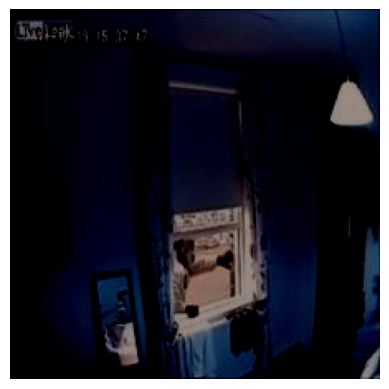

Stacking Prediction: ['Burglary026']


In [ ]:
#Load the models and make the predictions for test sample
import matplotlib.pyplot as plt
# === Load PCA & Classifiers ===
loaded_pca = joblib.load('pca_burglary.joblib')
loaded_stack = joblib.load('stacked_burglary_model.joblib')
print("Models Loaded!")

# === Load Label Encoder (OR create if not found) ===
import joblib
import os

if os.path.exists('label_encoder.joblib'):  # Check if file exists
    le = joblib.load('label_encoder.joblib')
else:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()  # Create a new LabelEncoder
    # Fit the LabelEncoder with the original labels (y_train)
    le.fit(labels)  # Changed from X_train_pca to y_train
    joblib.dump(le, 'label_encoder.joblib')  # Save for future use

print("Label Encoder Loaded!")

# Assuming you want to use the VGG16 model for feature extraction
from tensorflow.keras.applications import VGG16
feature_extractor = VGG16(weights='imagenet', include_top=False) # Define feature_extractor

# === Extract Features from New Image ===
test_img_path = '/content/test/Burglary026_x264_mp4-3_jpg.rf.300078aebb4c5d7d52d499a0d3f8289d.jpg'
test_feature, img_for_display = extract_features(test_img_path, feature_extractor)

# === PCA Transform ===
test_feature_pca = loaded_pca.transform([test_feature])

# === Display Image with Predictions ===
plt.imshow((img_for_display / 255.0))  # Normalize for display
plt.axis('off')

plt.show()

# === Predict with Random Forest ===
stack_pred = loaded_stack.predict(test_feature_pca)
pred_label = le.inverse_transform(stack_pred)
print("Stacking Prediction:", pred_label)

Models Loaded!
Label Encoder Loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step


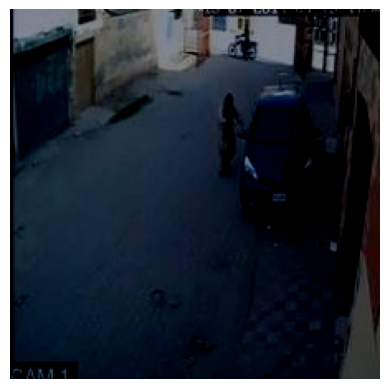

Stacking Prediction: ['Stealing095']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


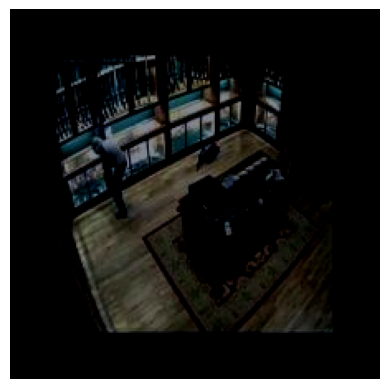

Stacking Prediction: ['Burglary049']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


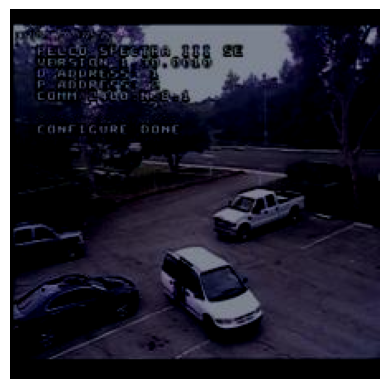

Stacking Prediction: ['Burglary']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


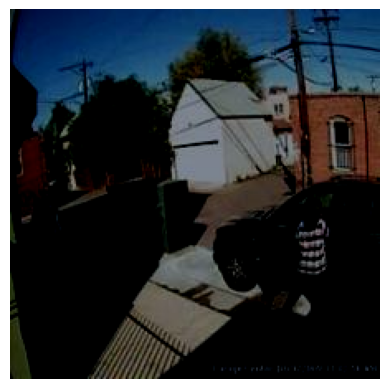

Stacking Prediction: ['Stealing018']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


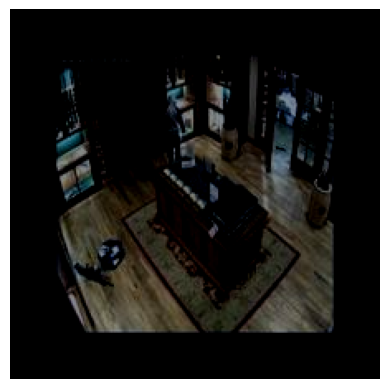

Stacking Prediction: ['Burglary049']


In [ ]:
import matplotlib.pyplot as plt
import joblib
import os
from tensorflow.keras.applications import VGG16

# === Load PCA & Classifiers ===
loaded_pca = joblib.load('pca_burglary.joblib')
loaded_stack = joblib.load('stacked_burglary_model.joblib')
print("Models Loaded!")

# === Load Label Encoder (OR create if not found) ===
if os.path.exists('label_encoder.joblib'):
    le = joblib.load('label_encoder.joblib')
else:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(labels)
    joblib.dump(le, 'label_encoder.joblib')
print("Label Encoder Loaded!")

# === Feature Extractor ===
feature_extractor = VGG16(weights='imagenet', include_top=False)

# === Directory of Test Images ===
test_images_dir = '/content/test/'  # Make sure this path is correct
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))][:5]  # Only 5 images

# === Loop through 5 test images ===
for img_file in image_files:
    test_img_path = os.path.join(test_images_dir, img_file)

    test_feature, img_for_display = extract_features(test_img_path, feature_extractor)
    test_feature_pca = loaded_pca.transform([test_feature])

    # Display Image
    plt.imshow(img_for_display / 255.0)
    plt.axis('off')

    plt.show()

    # Predict
    stack_pred = loaded_stack.predict(test_feature_pca)
    pred_label = le.inverse_transform(stack_pred)
    print("Stacking Prediction:", pred_label)


Models Loaded!
Label Encoder Loaded!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


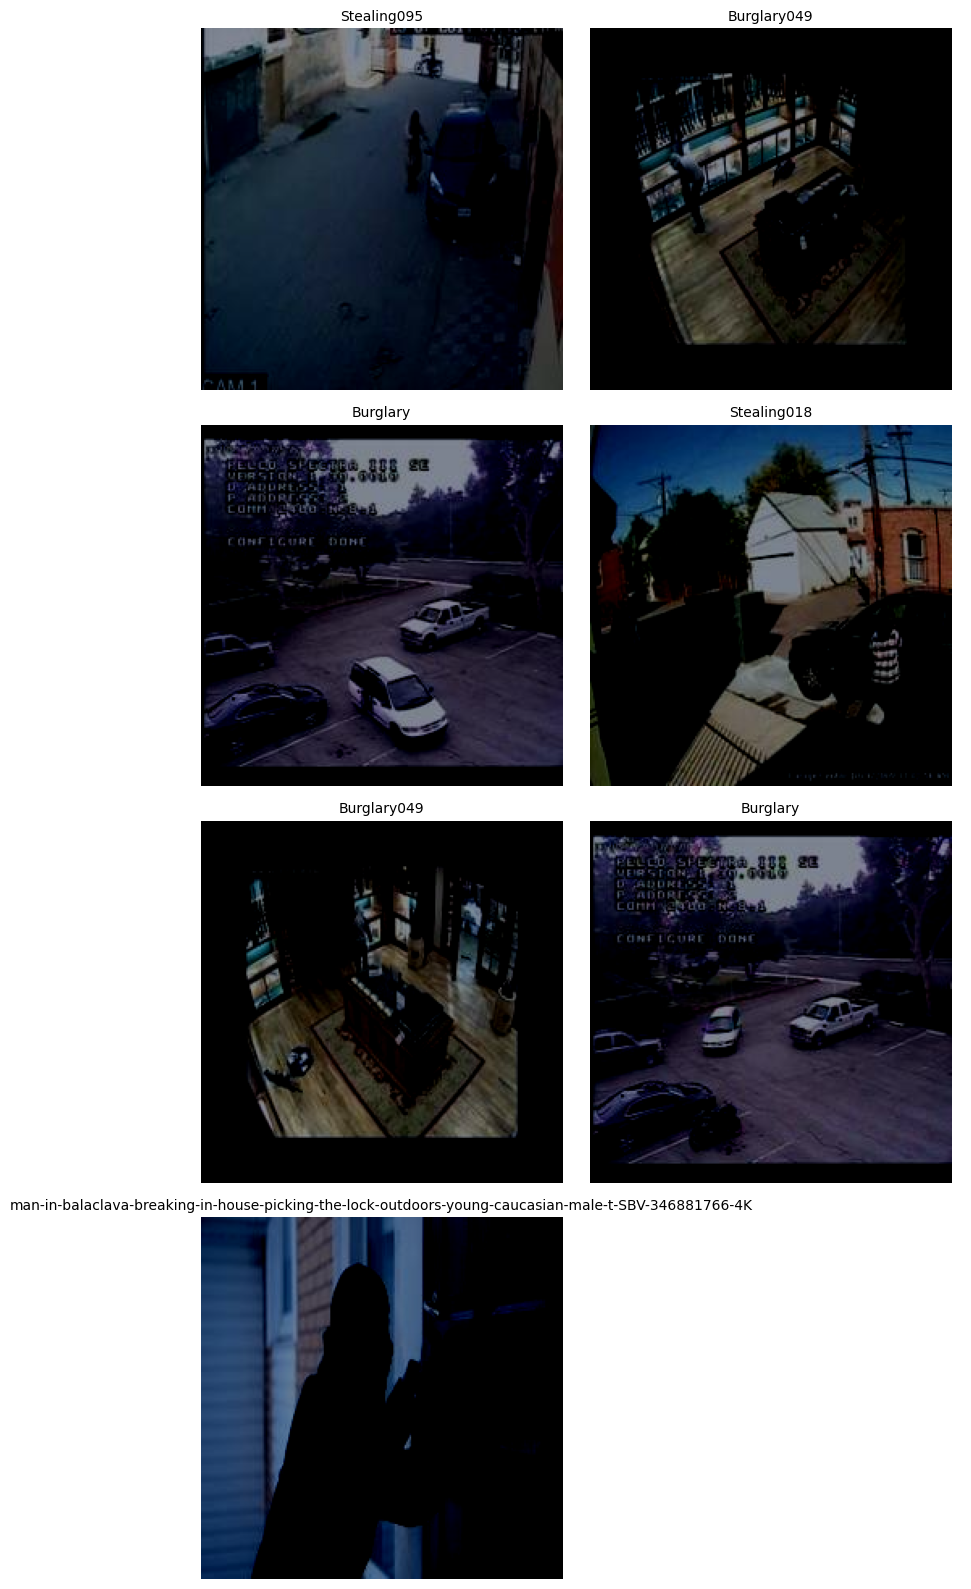

In [ ]:
import matplotlib.pyplot as plt
import joblib
import os
from tensorflow.keras.applications import VGG16

# === Load PCA & Classifiers ===
loaded_pca = joblib.load('pca_burglary.joblib')
loaded_stack = joblib.load('stacked_burglary_model.joblib')
print("Models Loaded!")

# === Load Label Encoder (OR create if not found) ===
if os.path.exists('label_encoder.joblib'):
    le = joblib.load('label_encoder.joblib')
else:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(labels)
    joblib.dump(le, 'label_encoder.joblib')
print("Label Encoder Loaded!")

# === Feature Extractor ===
feature_extractor = VGG16(weights='imagenet', include_top=False)

# === Directory of Test Images ===
test_images_dir = '/content/test/'
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))][:7]

# === Setup subplots: 4 rows, 2 columns (7 images total) ===
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(6, 14))
axes = axes.flatten()  # Flatten to 1D for easy iteration

# === Loop through 7 test images ===
for idx, img_file in enumerate(image_files):
    test_img_path = os.path.join(test_images_dir, img_file)

    test_feature, img_for_display = extract_features(test_img_path, feature_extractor)
    test_feature_pca = loaded_pca.transform([test_feature])

    # Predict
    stack_pred = loaded_stack.predict(test_feature_pca)
    pred_label = le.inverse_transform(stack_pred)

    # Display Image
    axes[idx].imshow(img_for_display / 255.0)
    axes[idx].axis('off')
    axes[idx].set_title(pred_label[0], fontsize=10)

# Hide any unused subplots
for i in range(len(image_files), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


E-MAIL NOTIFICATION

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

# Function to send an email notification
def send_email(prediction_label, img_path):
    sender_email = "221fa04261@gmail.com"
    receiver_email = "oliveangelina2005@gmail.com"
    subject = "Burglary Day-Time Prediction Notification"
    password = "rnai jroa vzju rgvc"  # Use an App Password for security

    # Email Content
    body = f"""
    Hello,

    The image is detected as: **{prediction_label}**

    Please check the attached image.


    """

    # Create email message
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = receiver_email
    msg['Subject'] = subject
    msg.attach(MIMEText(body, 'plain'))

    # Attach image
    try:
        with open(img_path, 'rb') as img_file:
            img_data = img_file.read()
        image_attachment = MIMEImage(img_data, name="predicted_image.jpg")
        msg.attach(image_attachment)
    except Exception as e:
        print(f"❌ Error loading image: {e}")
        return

    # Send Email
    try:
        server = smtplib.SMTP_SSL('smtp.gmail.com', 465)
        server.login(sender_email, password)
        server.sendmail(sender_email, receiver_email, msg.as_string())
        server.quit()
        print("✅ Email sent successfully!")
    except Exception as e:
        print(f"❌ Error sending email: {e}")

# ------------------------------------------------------------------------------------------
# Ensure pred_label is correctly assigned before calling send_email

try:
    pred_label = "Stealing"  # Replace with the actual prediction logic
except NameError:
    print("❌ Error: Prediction label is not defined.")

# Define image path
img_path = '/content/test/Stealing006_x264_mp4-12_jpg.rf.a505c068d346a0d6a1040d1c1d9d689e.jpg'

# Check if prediction is valid before sending email
if 'pred_label' in locals():
    send_email(pred_label, img_path)
else:
    print("❌ No prediction label available, email not sent.")


✅ Email sent successfully!


In [ ]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score

# Training accuracy
train_preds = stack_model.predict(X_train_pca)


# Testing accuracy
test_acc = accuracy_score(y_test, stack_preds)
print("Accuracy:", test_acc)



# Precision
precision = precision_score(y_test, stack_preds, average='weighted')  # Use 'binary' for binary classification
print("Precision:", precision)

# Recall
recall = recall_score(y_test, stack_preds, average='weighted')
print("Recall:", recall)

# F1 Score
f1 = f1_score(y_test, stack_preds, average='weighted')
print("F1 Score:", f1)


Accuracy: 0.9670103092783505
Precision: 0.968895202532673
Recall: 0.9670103092783505
F1 Score: 0.9653887229096204


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# === Training Predictions (optional) ===
train_preds = stack_model.predict(X_train_pca)

# === Testing Predictions ===
# === Metrics ===
test_acc = accuracy_score(y_test, stack_preds)
print("Accuracy:", test_acc)

precision = precision_score(y_test, stack_preds, average='weighted')
print("Precision:", precision)

recall = recall_score(y_test, stack_preds, average='weighted')
print("Recall:", recall)

f1 = f1_score(y_test, stack_preds, average='weighted')
print("F1 Score:", f1)

# === Classification Report ===
print("\nClassification Report:")
print(classification_report(y_test, stack_preds))


Accuracy: 0.9670103092783505
Precision: 0.968895202532673
Recall: 0.9670103092783505
F1 Score: 0.9653887229096204

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       242
           1       1.00      0.82      0.90        11
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      0.88      0.94        25
           6       1.00      0.60      0.75         5
           7       1.00      1.00      1.00        11
           8       1.00      0.91      0.95        11
           9       1.00      0.92      0.96        24
          10       1.00      0.60      0.75        10
          11       1.00      0.92      0.96        12
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        33
          14       0.90      1.00      0.95        

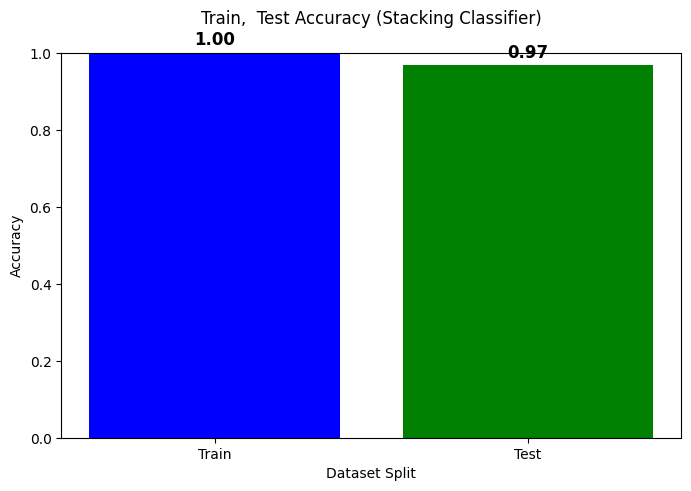

In [ ]:
#For plotting accuracy:
#------------------------------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
#------------------------------------------------------------------------
y_train_pred = stack_model.predict(X_train_pca)
#y_val_pred = stack_model.predict(X_val)
y_test_pred = stack_model.predict(X_test_pca)
#------------------------------------------------------------------------
train_acc = accuracy_score(y_train, y_train_pred)
#val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)
#------------------------------------------------------------------------
#labels = ["Train", "Validation", "Test"]
#accuracy = [train_acc, val_acc, test_acc]
labels = ["Train",  "Test"]
accuracy = [train_acc, test_acc]
#------------------------------------------------------------------------
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracy, color=["blue",  "green"])
plt.xlabel("Dataset Split")
plt.ylabel("Accuracy")
plt.title("Train,  Test Accuracy (Stacking Classifier)\n")
plt.ylim(0, 1)
for i, v in enumerate(accuracy):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=12, fontweight="bold")
plt.show()


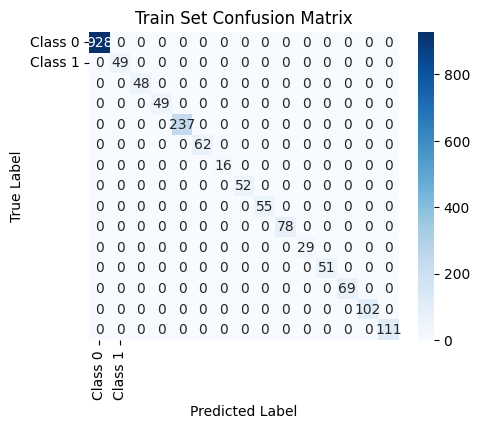

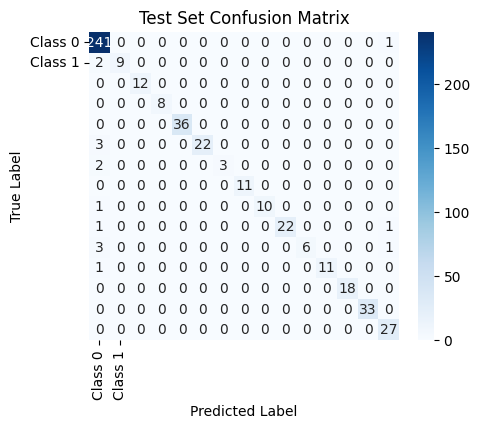

In [ ]:
#Confusion Matrix
#------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
#------------------------------------------------------------------------
train_cm = confusion_matrix(y_train, y_train_pred)
#val_cm = confusion_matrix(y_val, y_val_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
#------------------------------------------------------------------------
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()
#------------------------------------------------------------------------
plot_confusion_matrix(train_cm, "Train Set Confusion Matrix")
#plot_confusion_matrix(val_cm, "Validation Set Confusion Matrix")
plot_confusion_matrix(test_cm, "Test Set Confusion Matrix")